In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [24]:
def add_noise(
    x: torch.Tensor,
    max_randn_rate: float = 0.1,
    randn_rate: float | None = None,
    x_already_normed: bool = False
):
    """
    normalises the data and add some noise to the output distribution
    x: data to be normalised
    max_randn_rate = the magnitude of the mean and std shift
    """
    ndim = x.ndim-1
    if x_already_normed:
        x_std = torch.ones([x.shape[0]] + [1]*ndim, device=x.device, dtype=x.dtype)
        x_mean = torch.zeros([x.shape[0]] + [1]*ndim, device=x.device, dtype=x.dtype)
    else: 
        dim = list(range(1, x.ndim))
        x_std = x.std(dim=dim, keepdim=True)
        x_mean = x.mean(dim=dim, keepdim=True)
    if randn_rate is None:
        randn_rate = max_randn_rate * np.random.rand() * torch.rand(x_mean.shape, device=x.device, dtype=x.dtype)

    divisor = (x_std**2 + (x_std * randn_rate)**2) ** 0.5
    mean_shift = torch.randn(size=x.shape, device=x.device, dtype=x.dtype) * randn_rate * x_std
    return (x - x_mean + mean_shift) / (divisor + 1e-7)


tensor(0.9486, dtype=torch.float64)
tensor(0.0185, dtype=torch.float64)


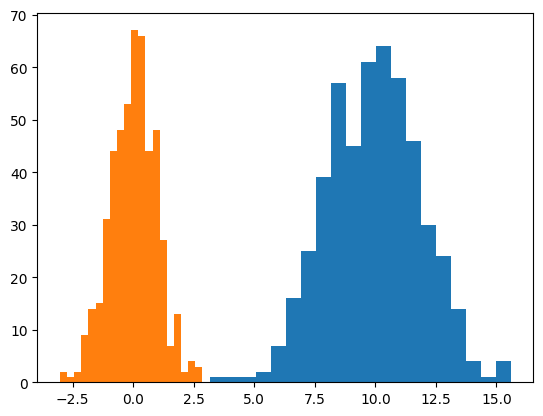

In [36]:
a = torch.from_numpy(np.random.normal(10.0, 2.0, (500,)))
na = add_noise(a, 0.1, 1.0, False)

_ = plt.hist(a.numpy(), bins=20, label="a")
_ = plt.hist(na.numpy(), bins=20, label="na")

print(torch.std(na))
print(torch.mean(na))